In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.model_selection import cross_val_score

In [21]:
df=pd.read_csv("dataset//titanic//train.csv")
df2=pd.read_csv("test_data")
df2.drop("Unnamed: 0",axis=1,inplace=True)
df2

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,0.452723,0,0,0.015282,0,1,0,1,0
1,3,0.617566,1,0,0.013663,1,0,0,0,1
2,2,0.815377,0,0,0.018909,0,1,0,1,0
3,3,0.353818,0,0,0.016908,0,1,0,0,1
4,3,0.287881,1,1,0.023984,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,0.353818,0,0,0.015713,0,1,0,0,1
414,1,0.512066,0,0,0.212559,1,0,1,0,0
415,3,0.505473,0,0,0.014151,0,1,0,0,1
416,3,0.353818,0,0,0.015713,0,1,0,0,1


In [15]:
df.drop("PassengerId",axis=1,inplace=True)
df.drop("Name",axis=1,inplace=True)
df.drop("Ticket",axis=1,inplace=True)
df.drop("Cabin",axis=1,inplace=True)
#df2.drop("PassengerId",axis=1,inplace=True)
#df2.drop("Name",axis=1,inplace=True)
#df2.drop("Ticket",axis=1,inplace=True)
#df2.drop("Cabin",axis=1,inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [4]:
df2

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,0.452723,0,0,0.015282,0,1,0,1,0
1,3,0.617566,1,0,0.013663,1,0,0,0,1
2,2,0.815377,0,0,0.018909,0,1,0,1,0
3,3,0.353818,0,0,0.016908,0,1,0,0,1
4,3,0.287881,1,1,0.023984,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,0.353818,0,0,0.015713,0,1,0,0,1
414,1,0.512066,0,0,0.212559,1,0,1,0,0
415,3,0.505473,0,0,0.014151,0,1,0,0,1
416,3,0.353818,0,0,0.015713,0,1,0,0,1


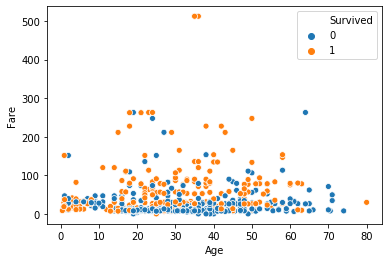

In [5]:
sns.scatterplot(x="Age",y="Fare",hue="Survived",data=df)

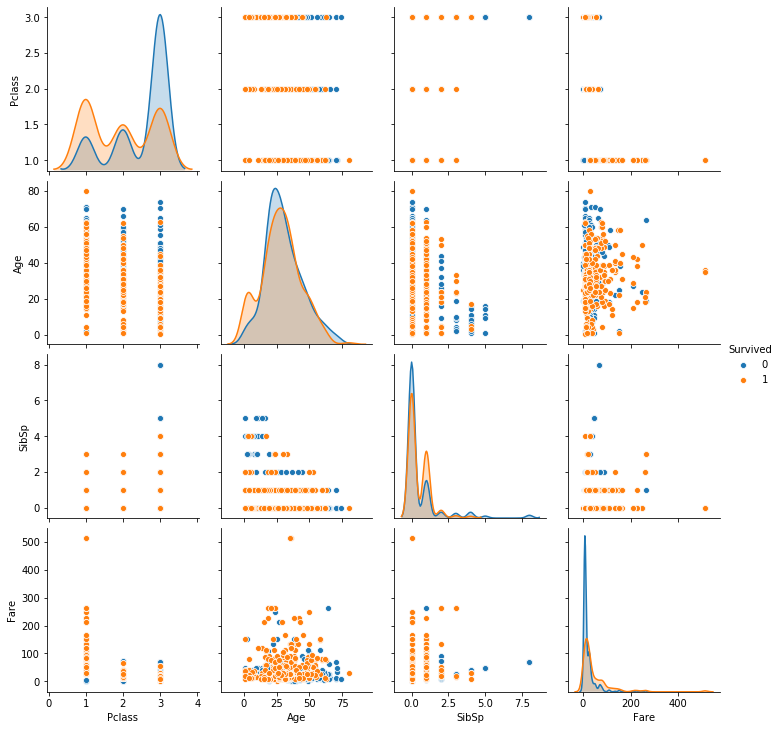

In [6]:
df1=df.copy()
df1.drop("Parch",inplace=True,axis=1)
sns.pairplot(df1,hue="Survived")

In [6]:
y=df["Survived"]
X=df.drop("Survived",axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [7]:
x=df["Age"].median()
df["Age"].fillna(x,inplace=True)
#x=df2["Age"].median()
#df2["Age"].fillna(x,inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [9]:
#x=df["Embarked"].mode()
#df["Embarked"].fillna(x,inplace=True)
#x=df2["Embarked"].mode()
#df2["Embarked"].fillna(x,inplace=True)
#x=df2["Fare"].mean()
#df2["Fare"].fillna(x,inplace=True)

In [10]:
df=pd.get_dummies(df)
#df2=pd.get_dummies(df)

In [11]:
a=["Age","Fare"]
scl=StandardScaler()
for col in a:
        df[col] = pd.DataFrame(scl.fit_transform(pd.DataFrame(df[col])),columns=[col])

In [12]:
y=df["Survived"]
X=df.drop("Survived",axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Age         891 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Sex_female  891 non-null    uint8  
 6   Sex_male    891 non-null    uint8  
 7   Embarked_C  891 non-null    uint8  
 8   Embarked_Q  891 non-null    uint8  
 9   Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 39.3 KB


In [13]:
n=[9,10,11,13,25,50]
h=[]
for i in n:
    knnc=knn(n_neighbors=i)
    cv=cross_val_score(knnc,X,y)
    h.append(cv.mean())
for i,j in enumerate(h):
    print(i,j)
#print(h)

0 0.806973824618668
1 0.8103320569957944
2 0.808097420124286
3 0.7991086560793422
4 0.8069675475488044
5 0.7957818090515347


In [14]:
a=["Age","Fare"]
scl=MinMaxScaler()
for col in a:
        df[col] = pd.DataFrame(scl.fit_transform(pd.DataFrame(df[col])),columns=[col])
for col in a:
        df2[col] = pd.DataFrame(scl.fit_transform(pd.DataFrame(df2[col])),columns=[col])

In [15]:
y=df["Survived"]
X=df.drop("Survived",axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Age         891 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Sex_female  891 non-null    uint8  
 6   Sex_male    891 non-null    uint8  
 7   Embarked_C  891 non-null    uint8  
 8   Embarked_Q  891 non-null    uint8  
 9   Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 39.3 KB


In [16]:
n=[9,10,12,13,14,50]
h=[]
for i in n:
    knnc=knn(n_neighbors=i)
    cv=cross_val_score(knnc,X,y)
    h.append(cv.mean())
for i,j in enumerate(h):
    print(i,j)
knnc=knn(n_neighbors=12).fit(X,y)
a=knnc.predict(df2)
a

0 0.7934906785512523
1 0.8080723118448307
2 0.8204130311970372
3 0.812560416797439
4 0.811436821291821
5 0.7912874270290627


array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [17]:
print(X.shape)
y=y.tolist()

(891, 10)


In [18]:
df2

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,0.452723,0,0,0.015282,0,1,0,1,0
1,3,0.617566,1,0,0.013663,1,0,0,0,1
2,2,0.815377,0,0,0.018909,0,1,0,1,0
3,3,0.353818,0,0,0.016908,0,1,0,0,1
4,3,0.287881,1,1,0.023984,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,0.353818,0,0,0.015713,0,1,0,0,1
414,1,0.512066,0,0,0.212559,1,0,1,0,0
415,3,0.505473,0,0,0.014151,0,1,0,0,1
416,3,0.353818,0,0,0.015713,0,1,0,0,1


In [19]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,0.271174,1,0,0.014151,0,1,0,0,1
1,1,0.472229,1,0,0.139136,1,0,1,0,0
2,3,0.321438,0,0,0.015469,1,0,0,0,1
3,1,0.434531,1,0,0.103644,1,0,0,0,1
4,3,0.434531,0,0,0.015713,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,0.334004,0,0,0.025374,0,1,0,0,1
887,1,0.233476,0,0,0.058556,1,0,0,0,1
888,3,0.346569,1,2,0.045771,1,0,0,0,1
889,1,0.321438,0,0,0.058556,0,1,1,0,0


In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Age         418 non-null    float64
 2   SibSp       418 non-null    int64  
 3   Parch       418 non-null    int64  
 4   Fare        418 non-null    float64
 5   Sex_female  418 non-null    int64  
 6   Sex_male    418 non-null    int64  
 7   Embarked_C  418 non-null    int64  
 8   Embarked_Q  418 non-null    int64  
 9   Embarked_S  418 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 32.8 KB


In [21]:
knnc=knn(n_neighbors=12).fit(X,y)

a=knnc.predict(df2)
print(a)
a=pd.Series(a)
b=[i for i in range(892,1310)]
data=pd.DataFrame({"PassengerId":b,"Survived":a})
data.set_index("PassengerId",inplace=True)
data.to_csv("result.csv")

[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0
 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 0]


In [19]:
df2

,Unnamed: 0,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0.452723,0,0,0.015282,0,1,0,1,0
1,1,3,0.617566,1,0,0.013663,1,0,0,0,1
2,2,2,0.815377,0,0,0.018909,0,1,0,1,0
3,3,3,0.353818,0,0,0.016908,0,1,0,0,1
4,4,3,0.287881,1,1,0.023984,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,413,3,0.353818,0,0,0.015713,0,1,0,0,1
414,414,1,0.512066,0,0,0.212559,1,0,1,0,0
415,415,3,0.505473,0,0,0.014151,0,1,0,0,1
416,416,3,0.353818,0,0,0.015713,0,1,0,0,1


In [18]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,-0.565736,1,0,-0.502445,0,1,0,0,1
1,1,0.663861,1,0,0.786845,1,0,1,0,0
2,3,-0.258337,0,0,-0.488854,1,0,0,0,1
3,1,0.433312,1,0,0.420730,1,0,0,0,1
4,3,0.433312,0,0,-0.486337,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,-0.181487,0,0,-0.386671,0,1,0,0,1
887,1,-0.796286,0,0,-0.044381,1,0,0,0,1
888,3,-0.104637,1,2,-0.176263,1,0,0,0,1
889,1,-0.258337,0,0,-0.044381,0,1,1,0,0


In [24]:
len(a)

418

In [25]:
data

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


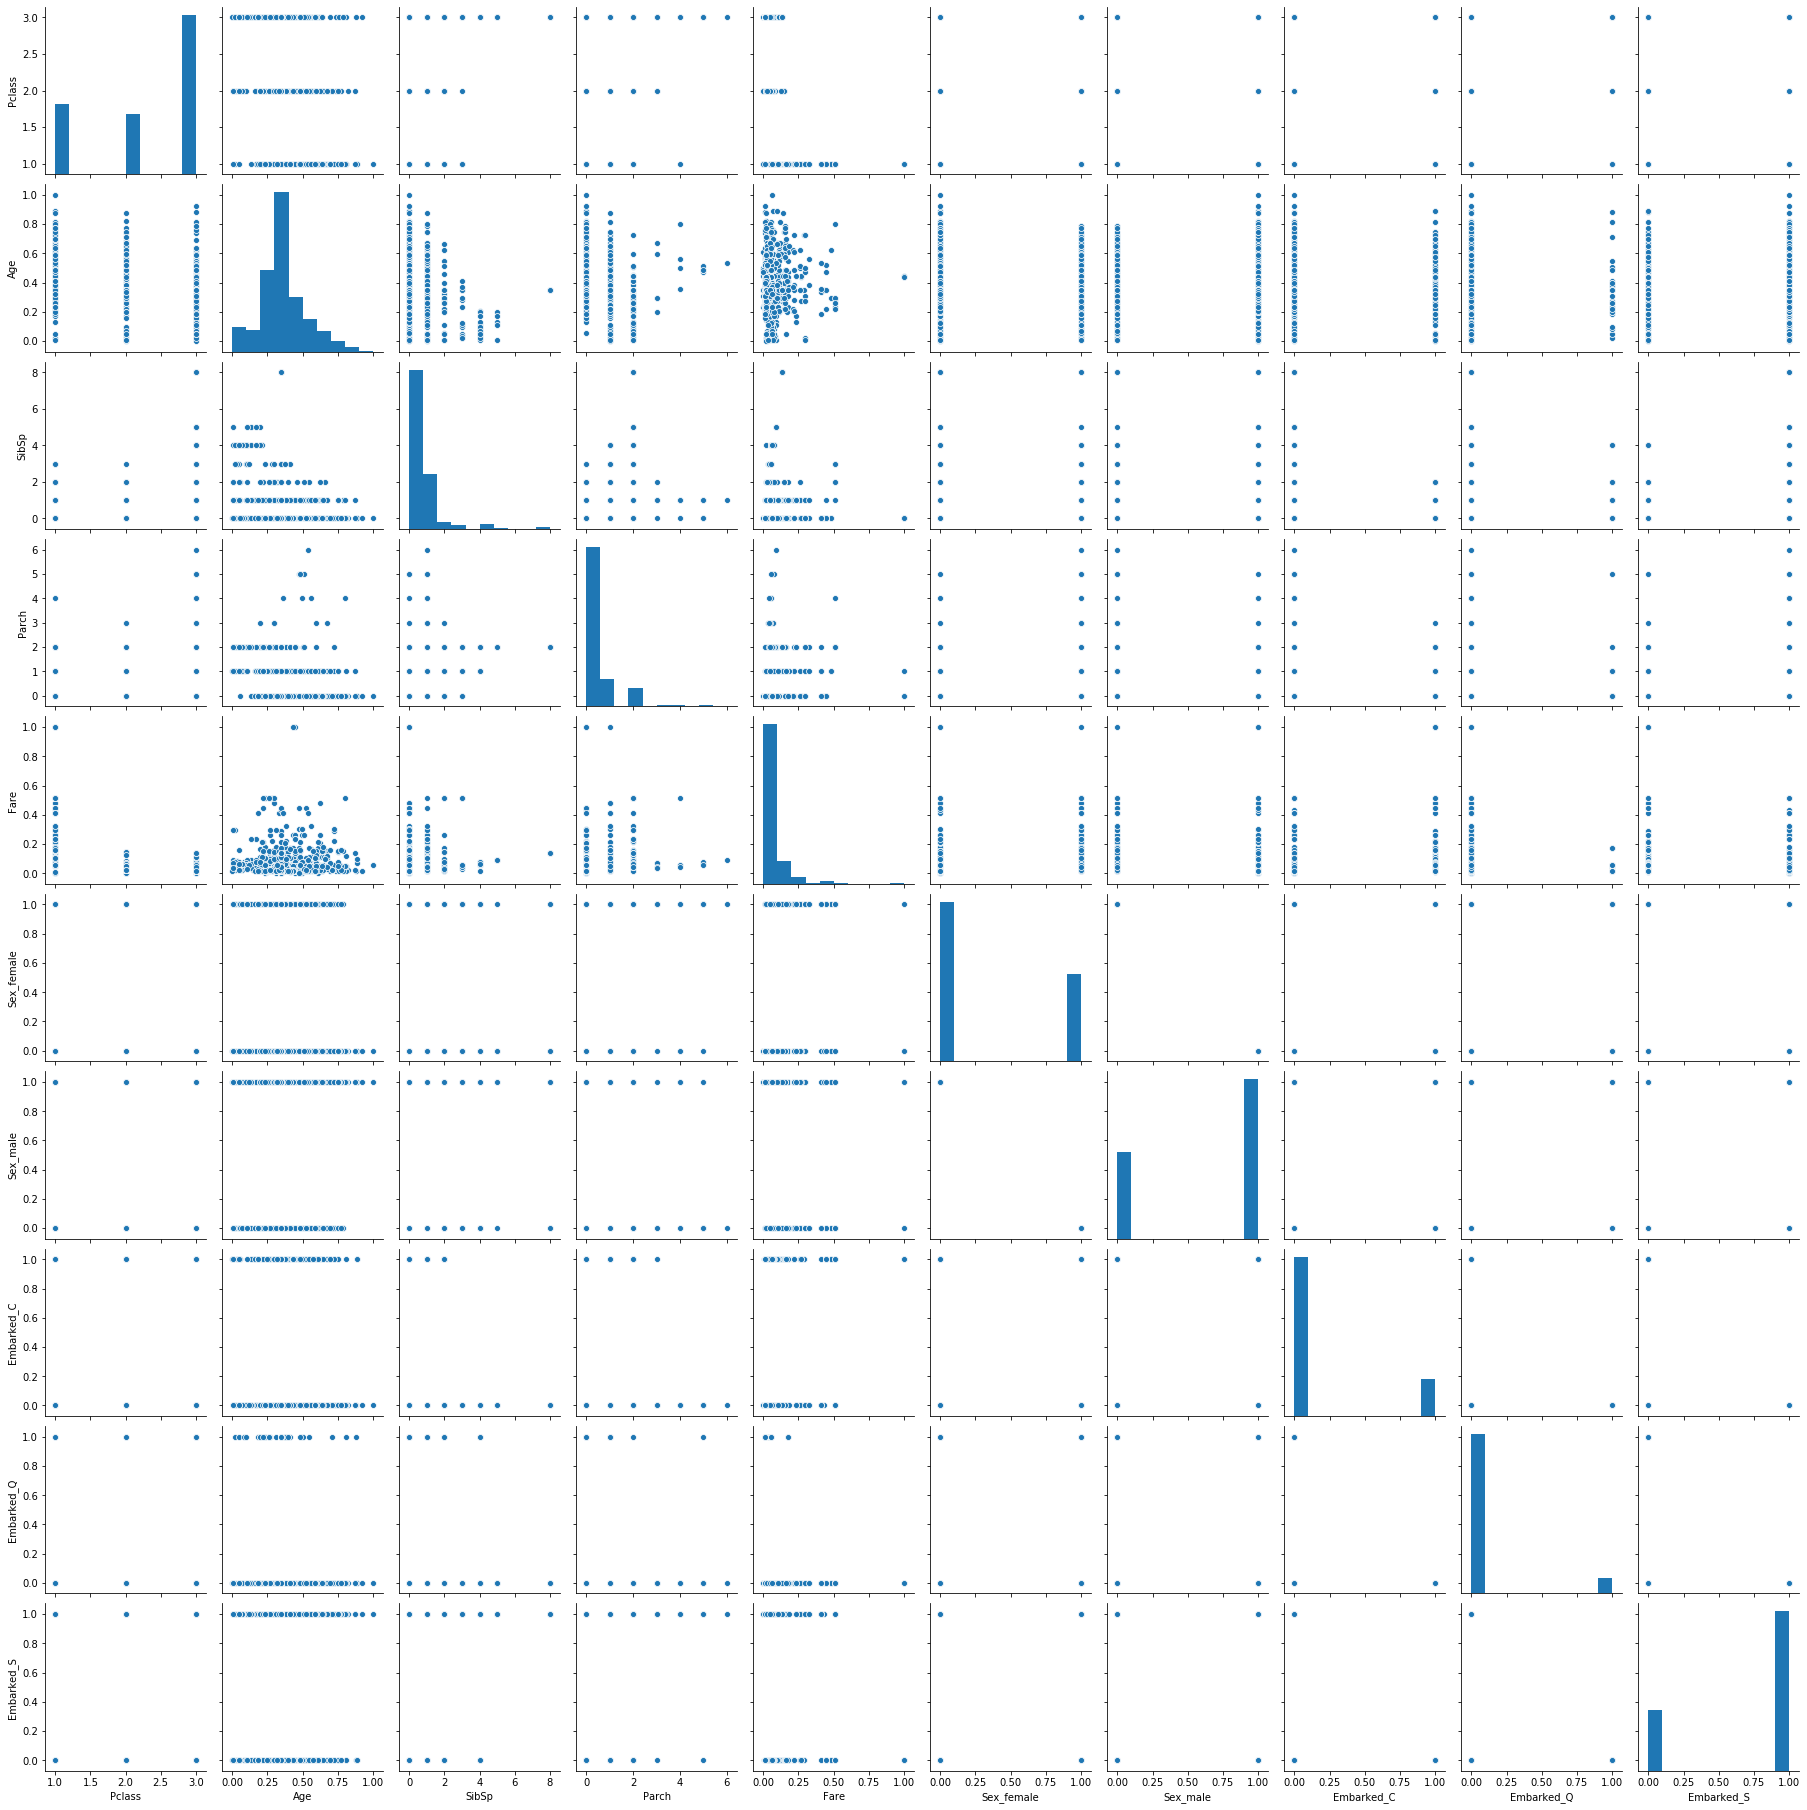

In [26]:
sns.pairplot(X)

In [23]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 100, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
from sklearn.ensemble import RandomForestClassifier

rf =  RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,  cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
cls=rf_random.fit(X, y)
k=rf_random.best_params_
print(k)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   13.9s finished


{'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 43}


In [27]:
clf=RandomForestClassifier(n_estimators= 100, min_samples_split= 10, min_samples_leaf= 2, max_features= 'auto', max_depth= 20)
clf.fit(X,y)
cv=cross_val_score(clf,X,y)
print(cv.mean())
dat=clf.predict(df2)
a=pd.Series(dat)
b=[i for i in range(892,1310)]
data=pd.DataFrame({"PassengerId":b,"Survived":a})
data.set_index("PassengerId",inplace=True)
data.to_csv("result3.csv")

0.8305567760969181
